# Bias Variance Tradeoff

## Bias Variance Tradeoff

Irreducible Error

* Noise is random (vs deterministic)
* Can't predict its values, just statistics like mean and variance
* $y = \beta_0 + \beta_i X_i + e_i$
* Where $e$ is irreducible error
* $e \sim N(0, \sigma^2)$
* $\hat{f}(X_i) = \beta_i X_i$ is estimate
* Minimizing the reducible error provides better insight into irreducible error
* Overall error is a combination of:
  * Bias
  * Variance
  * Irreducible Error
* Trade off occurs because as we reduce one the other increases (bias v variance)

Bias (Squared)

* Not the intercept or constant
* Refers to the delta between your average $f(x)$ and the true $f(x)$
* $bias = [f(x) - \bar{f}(x)]^2$
* Hi Bias: Underfit, Lo Bias: Overfit

Variance

* Not the deviation from a mean
* Variance of predictor over all possible training sets, how inconsistent a predictor is over different training sets
* $E[(\hat{f}(x) - \bar{f}(x))^2]$
* Low Variance: Underfit, Hi Variance: Overfit

Bias Variance Tradeoff

* As one goes up the other goes down
* What about combining models, with fine tuned bias for one and variance for the other
* $y = f(x) + e$
* $e \sim N(0, \sigma^2)$
* $expected error = bias^2 + variance + irreducible error$
* $= bias^2 + variance + \sigma^2$
* $= [f(x) - \bar{f}(x)]^2 + E[(\hat{f}(x) - \bar{f}(x))^2] + E[e^2]$
  * $y = f(x)$
  * $\hat{f}(x) = estimated f(x)$
  * $\bar{f}(x) = E[\hat{f}(x)]$

* $E[f(x) - \hat{f}(x)] = [f(x) - \bar{f}(x)]^2 + E[(\hat{f}(x) - \bar{f}(x))^2] + var(e)$

<a title="Bigbossfarin, CC0, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Bias_and_variance_contributing_to_total_error.svg"><img alt="Bias and variance contributing to total error" src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Bias_and_variance_contributing_to_total_error.svg/640px-Bias_and_variance_contributing_to_total_error.svg.png"></a>

<p>Bigbossfarin, CC0, via Wikimedia Commons</p>

<a title="Source: http://scott.fortmann-roe.com/docs/BiasVariance.html" href="https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/images/bias_variance/bullseye.png"><img width="640" alt="Bias and variance contributing to total error" src="https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/images/bias_variance/bullseye.png"></a>

<p>Source: http://scott.fortmann-roe.com/docs/BiasVariance.html</p>

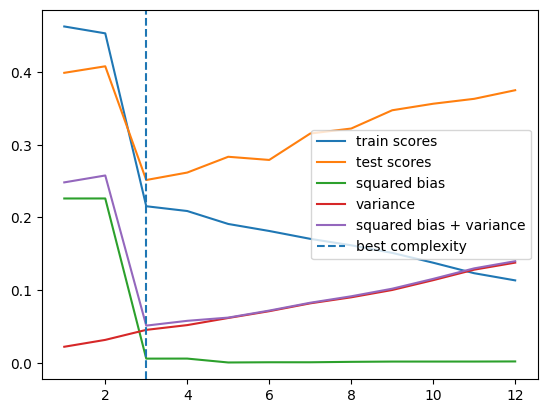

In [ ]:
# https://github.com/lazyprogrammer/machine_learning_examples/blob/master/supervised_class2/bias_variance_demo.py
# https://deeplearningcourses.com/c/machine-learning-in-python-random-forest-adaboost
# https://www.udemy.com/machine-learning-in-python-random-forest-adaboost
from __future__ import print_function, division
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

NUM_DATASETS = 50
NOISE_VARIANCE = 0.5
MAX_POLY = 12
N = 25
Ntrain = int(0.9*N)

np.random.seed(2)

# make a dataset with x^D, x^(D-1), ..., x^0
def make_poly(x, D):
  N = len(x)
  X = np.empty((N, D+1))
  for d in range(D+1):
    X[:,d] = x**d
    if d > 1:
      X[:,d] = (X[:,d] - X[:,d].mean()) / X[:,d].std()
  return X

def f(X):
  return np.sin(X)


x_axis = np.linspace(-np.pi, np.pi, 100)
y_axis = f(x_axis)

# plot the data
# plt.plot(x_axis, y_axis)
# plt.show()

# f(x) = sin(x) from x = [-pi, +pi]
X = np.linspace(-np.pi, np.pi, N)
np.random.shuffle(X)
f_X = f(X)

# just need to do this once
Xpoly = make_poly(X, MAX_POLY)

# array to store all the scores
train_scores = np.zeros((NUM_DATASETS, MAX_POLY))
test_scores = np.zeros((NUM_DATASETS, MAX_POLY))
# squared_biases = np.zeros((NUM_DATASETS, MAX_POLY))
# test_predictions = np.zeros((N - Ntrain, NUM_DATASETS, MAX_POLY))
train_predictions = np.zeros((Ntrain, NUM_DATASETS, MAX_POLY))
prediction_curves = np.zeros((100, NUM_DATASETS, MAX_POLY))

# create the model
model = LinearRegression()

for k in range(NUM_DATASETS):
  Y = f_X + np.random.randn(N)*NOISE_VARIANCE

  Xtrain = Xpoly[:Ntrain]
  Ytrain = Y[:Ntrain]

  Xtest = Xpoly[Ntrain:]
  Ytest = Y[Ntrain:]

  for d in range(MAX_POLY):
    model.fit(Xtrain[:,:d+2], Ytrain)
    predictions = model.predict(Xpoly[:,:d+2])

    # debug
    x_axis_poly = make_poly(x_axis, d+1)
    prediction_axis = model.predict(x_axis_poly)
    # plt.plot(x_axis, prediction_axis)
    # plt.show()

    prediction_curves[:,k,d] = prediction_axis

    train_prediction = predictions[:Ntrain]
    test_prediction = predictions[Ntrain:]

    train_predictions[:,k,d] = train_prediction # use this to calculate bias/variance later

    train_score = mse(train_prediction, Ytrain)
    test_score = mse(test_prediction, Ytest)

    train_scores[k,d] = train_score
    test_scores[k,d] = test_score

# show all prediction curves for each polynomial degree
# along with the mean curve
# for d in range(MAX_POLY):
#   for k in range(NUM_DATASETS):
#     plt.plot(x_axis, prediction_curves[:,k,d], color='green', alpha=0.5)
#   plt.plot(x_axis, prediction_curves[:,:,d].mean(axis=1), color='blue', linewidth=2.0)
#   plt.title("All curves for degree = %d" % (d+1))
#   plt.show()

# calculate the squared bias
avg_train_prediction = np.zeros((Ntrain, MAX_POLY))
squared_bias = np.zeros(MAX_POLY)
f_Xtrain = f_X[:Ntrain]
for d in range(MAX_POLY):
  for i in range(Ntrain):
    avg_train_prediction[i,d] = train_predictions[i,:,d].mean()
  squared_bias[d] = ((avg_train_prediction[:,d] - f_Xtrain)**2).mean()

# calculate the variance
variances = np.zeros((Ntrain, MAX_POLY))
for d in range(MAX_POLY):
  for i in range(Ntrain):
    delta = train_predictions[i,:,d] - avg_train_prediction[i,d]
    variances[i,d] = delta.dot(delta) / len(delta)
variance = variances.mean(axis=0)

# make bias-variance plots
degrees = np.arange(MAX_POLY) + 1
best_degree = np.argmin(test_scores.mean(axis=0)) + 1

plt.plot(degrees, train_scores.mean(axis=0), label='train scores')
plt.plot(degrees, test_scores.mean(axis=0), label='test scores')

plt.plot(degrees, squared_bias, label='squared bias')
plt.plot(degrees, variance, label='variance')
plt.plot(degrees, squared_bias + variance, label='squared bias + variance')
plt.axvline(x=best_degree, linestyle='--', label='best complexity')
plt.legend()
plt.show()

# train score vs test score
# plt.plot(degrees, train_scores.mean(axis=0), label='train scores')
# plt.plot(degrees, test_scores.mean(axis=0), label='test scores')
# plt.axvline(x=best_degree, linestyle='--', label='best complexity')
# plt.legend()
# plt.show()

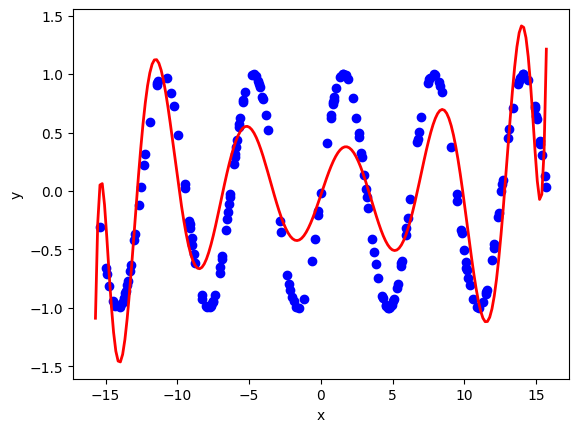

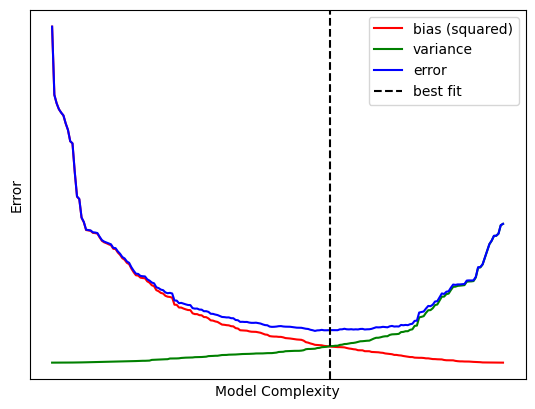

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as mse

X = np.linspace(-5 * np.pi, 5 * np.pi, 1000)
y = np.sin(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

train_scores = []
train_mse = []
test_mse = []

model = LinearRegression()

models = 30
for d in range(models):

  poly = PolynomialFeatures(degree=d)
  poly_train = poly.fit_transform(X_train)
  poly_test = poly.transform(X_test)
  model.fit(poly_train, y_train)

  # train mse
  xs = np.linspace(-5 * np.pi, 5 * np.pi, len(X_train)).reshape(-1, 1)
  Xpoly = poly.transform(xs)
  train_mse.append(mse(model.predict(Xpoly), y_train))

  # test mse
  xs = np.linspace(-5 * np.pi, 5 * np.pi, len(X_test)).reshape(-1, 1)
  Xpoly = poly.transform(xs)
  test_mse.append(mse(model.predict(Xpoly), y_test))

  # print(d, 'Train:', model.score(poly_train, y_train))
  # print(d, 'Test:', model.score(poly_test, y_test))
  train_scores.append(model.score(poly_train, y_train))
  # test_scores.append(model.score(poly_test, y_test))

idx_train = np.argmax(train_scores)
# idx_test = np.argmax(test_scores)
# print(idx_train, train_scores[idx_train])
# print(idx_test, test_scores[idx_train])
# print(max(train_scores))
# print(max(test_scores))
# print(len(test_scores))

poly = PolynomialFeatures(degree=idx_train)
poly_train = poly.fit_transform(X_train)
poly_test = poly.transform(X_test)

model = LinearRegression()
model.fit(poly_train, y_train)

xs = np.linspace(-5 * np.pi, 5 * np.pi, len(X_test)).reshape(-1, 1)
Xpoly = poly.transform(xs)
predictions = model.predict(Xpoly)

plt.plot(xs, predictions, color='red', linewidth=2)
plt.scatter(X_test, y_test, color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# bias variance tradeoff
xbv = np.linspace(1, models, len(y_test))
bias = [(y-p)**2 for y, p in zip(y_test, predictions)]
# bias = [(np.mean(predictions)-y)**2 for y in y_test]
variance = [np.mean((p-np.mean(predictions))**2) for p in predictions]
bias = sorted(bias, reverse=True)
variance = sorted(variance)
noise = np.random.randn(len(y_test))
noise = sorted(noise)
error = [b+v for b, v in zip(bias, variance)]
# error = error + noise
best_fit=xbv[np.argmin(error)]+1
# print(best_fit)

plt.plot(xbv, bias, color='red', label='bias (squared)')
plt.plot(xbv, variance, color='green', label='variance')
plt.plot(xbv, error, color='blue', label='error')
plt.axvline(x=best_fit, color='black', linestyle='--', label='best fit')
plt.legend()
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.xticks([])
plt.yticks([])
plt.show()

# mse scores plot
# xbv = np.linspace(1, models, models)
# plt.plot(xbv, train_mse, color='red', label='train mse')
# plt.plot(xbv, test_mse, color='green', label='test mse')
# plt.legend()
# plt.xlabel('x')
# plt.ylabel('y')
# plt.xticks([])
# plt.yticks([])
# plt.show()

## The Bias-Variance Decomposition Explained

Your two expressions map directly onto this tradeoff:

### 1. The Statistical Expression

$$[f(x) - \bar{f}(x)]^2 + E[(\hat{f}(x) - \bar{f}(x))^2]$$

This expression represents the two main sources of error that are *reducible* by adjusting the model's complexity:

* **$[f(x) - \bar{f}(x)]^2 \longrightarrow \text{Bias}^2$ (Squared Bias):**
    * $f(x)$ is the **true underlying function** (the target).
    * $\bar{f}(x)$ is the **average predicted function** across all possible training datasets.
    * The squared difference measures how far the average prediction is from the truth. **High bias** (large gap) occurs when the model is too simple (**underfitting**) to capture the true patterns.

* **$E[(\hat{f}(x) - \bar{f}(x))^2] \longrightarrow \text{Variance}$:**
    * This is the **expected squared difference** between a single model's prediction ($\hat{f}(x)$) and the average prediction ($\bar{f}(x)$).
    * It measures the **variability** of the model's prediction for a given $x$, essentially showing how much the prediction would change if the model were trained on a different dataset. **High variance** occurs when the model is too complex (**overfitting**) and sensitive to noise in the training data.

### 2. The Conceptual Expression

$$\mathbf{\text{bias}^2 + \text{variance}}$$

This is the standard, simplified conceptual term for the decomposition, explicitly naming the two key components that make up the **expected error** ($\text{E}[(\hat{f}(x) - f(x))^2]$).

### The Tradeoff

The **Bias-Variance Tradeoff** states that there is an inverse relationship between these two terms:

* **Increasing model complexity** (e.g., adding more features or depth to a neural network) typically **reduces bias** but **increases variance**.
* **Decreasing model complexity** (e.g., using a linear model) typically **increases bias** but **reduces variance**.

The goal of model selection is to find the sweet spot—the complexity level that **minimizes the total error** ($\text{Bias}^2 + \text{Variance}$).
